Question 1

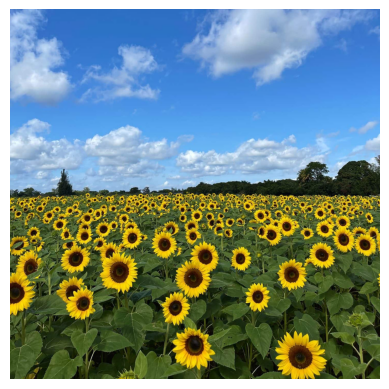

In [128]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread('the_berry_farms_sunflower_field.jpeg' ,1)
# Check if image is loaded fine
if im is None:
    print('Error opening image!')
    exit(0)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [104]:
im.shape

(1440, 1440)

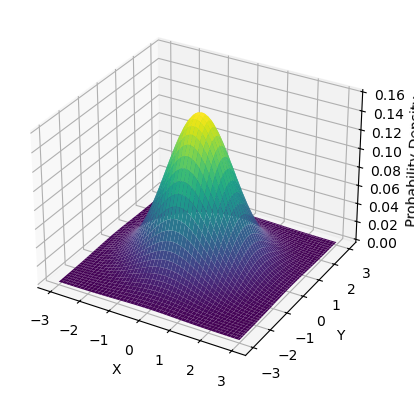

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# 2D Gaussian formula (height = probability density)
Z = np.exp(-(X**2 + Y**2) / 2) / (2 * np.pi)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
plt.show()

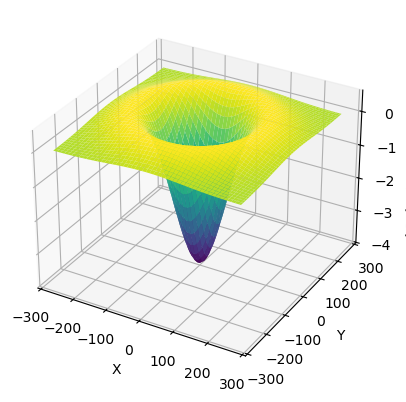

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create grid
sgm=90
x = np.linspace(-3*sgm, 3*sgm, 100)
y = np.linspace(-3*sgm, 3*sgm, 100)
X, Y = np.meshgrid(x, y)


# 2D Laplacian of gaussian formula
LoG = -1*sgm**2/(np.pi * sgm**4) * (1 - (X**2 + Y**2) / (2 * sgm**2)) * np.exp(-(X**2 + Y**2) / (2 * sgm**2))

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, LoG, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Laplacian of Gaussian')
plt.show()

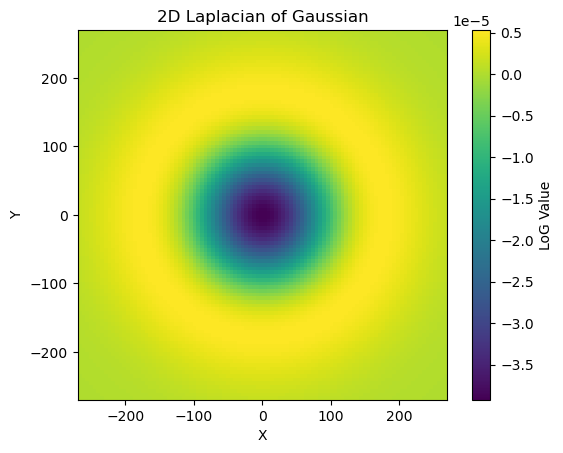

In [107]:
plt.imshow(LoG, extent=[x.min(), x.max(), y.min(), y.max()], cmap='viridis')
plt.colorbar(label='LoG Value')
plt.title('2D Laplacian of Gaussian')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


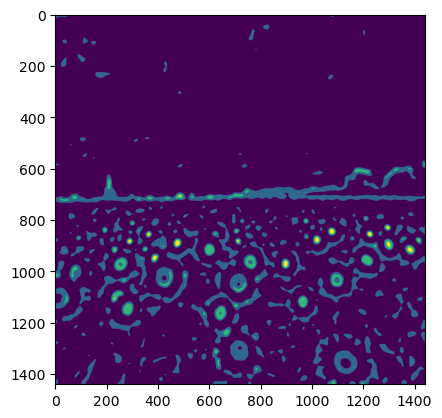

In [108]:
sgm=60
LoG = -1*sgm**2/(np.pi * sgm**4) * (1 - (X**2 + Y**2) / (2 * sgm**2)) * np.exp(-(X**2 + Y**2) / (2 * sgm**2))

plt.imshow(cv.filter2D(im, -1, LoG))

In [111]:
filter_images = []
for i in range(10, 80, 1):
    sgm = i
    LoG = -1 * sgm**2 / (np.pi * sgm**4) * (1 - (X**2 + Y**2) / (2 * sgm**2)) * np.exp(-(X**2 + Y**2) / (2 * sgm**2))
    p = cv.filter2D(im, -1, LoG)
    filter_images.append(p)

filter_images = np.array(filter_images)
filter_images.shape



(70, 1440, 1440)

In [125]:
from skimage.feature import peak_local_max


data_3d = filter_images

coordinates = peak_local_max(
    data_3d, 
    min_distance=20, 
    threshold_rel=0.1,  # Only consider peaks > 10% of the max value
    exclude_border=False
)

print("Detected Peak Coordinates (Z, Y, X):")
print(coordinates)

# The output for a 3D array will be an N x 3 array of (z, y, x) indices.

Detected Peak Coordinates (Z, Y, X):
[[   0  728  974]
 [   0  730 1055]
 [   0  732 1363]
 ...
 [  69 1283  737]
 [  69 1338 1030]
 [  69 1433 1153]]


In [116]:
coordinates+=[10,0,0]

In [117]:
coordinates

array([[  10,  728,  974],
       [  10,  732, 1363],
       [  12,  727,  509],
       [  10,  634,  209],
       [  10,  903,   65],
       [  10,  912,  288],
       [  10,  983,  703],
       [  10, 1071,  974],
       [  14, 1438, 1151],
       [  73, 1145,  284],
       [  10, 1184,   10],
       [  10, 1187, 1331],
       [  10, 1364,  318],
       [  10, 1383,  771],
       [  10,    0,  108],
       [  10,  189,  518],
       [  10,  246,  207],
       [  10,  467,  419],
       [  10, 1438,   59],
       [  17,   53,  806],
       [  21,  315,    0],
       [  31,    0, 1293],
       [  40,  237, 1074],
       [  51,    0, 1075]], dtype=int64)

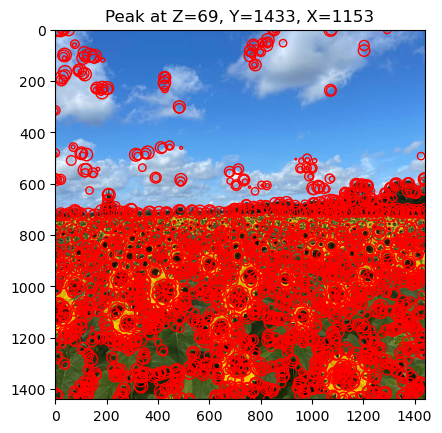

In [130]:
# generate circles with detected peaks marked in original image
img = cv.imread('the_berry_farms_sunflower_field.jpeg' ,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
for coord in coordinates:
    z, y, x = coord
    plt.scatter(x, y, s=1.414*z, edgecolor='red', facecolor='none')  # Circle marker
    plt.title(f'Peak at Z={z}, Y={y}, X={x}')   
plt.show()

In [ ]:
cv.imread('the_berry_farms_sunflower_field.jpeg' ,1)

Q2

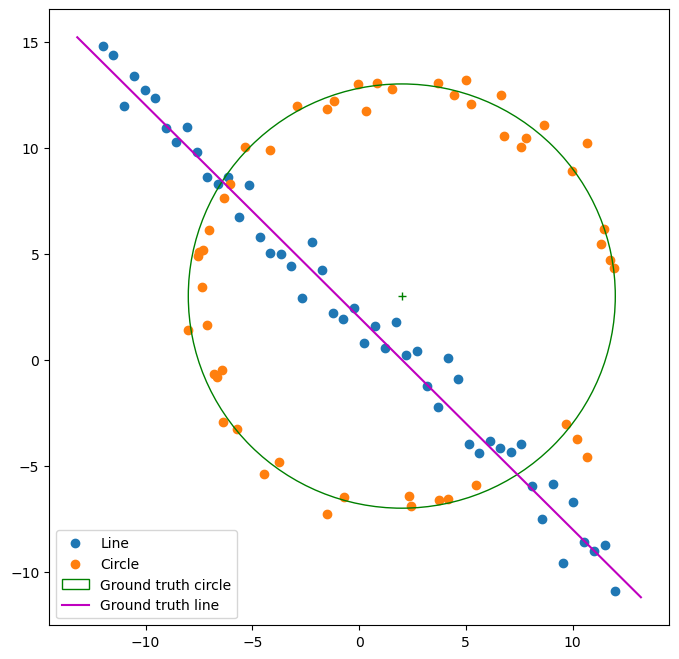

In [5]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt

# np.random.seed(0)
N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2 * np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot((x0_gt), (y0_gt), '+', color='g')
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')
plt.legend()
plt.show() # Added to display the plot

we can assume the normal distribution with mean 0 and std 1 so 99.5 in 2.8 width

In [19]:
p=0.99
e=0.5

In [20]:
N=np.log(1-p)/np.log(1-(1-e)**2)
N

16.007845559302186

In [26]:
len(X)

100

New best model with 23 inliers
New best model with 57 inliers
New best model with 58 inliers


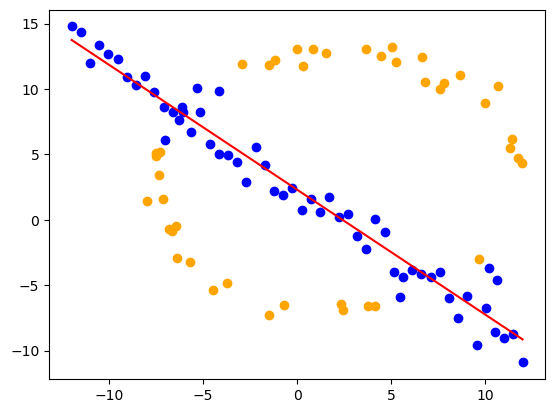

In [69]:
Max=0

for _ in range(int(N)):
    # RANSAC iteration code here
    two_points=np.random.choice(len(X), 2, replace=False)
    coordinates=X[two_points]
    x1,x2 = coordinates
    # Fit line to these two points
    (x1,y1),(x2,y2)= np.array(x1),np.array(x2)

    A = (y1-y2)  
    B = (x2-x1)
    C = (x1*y2 - x2*y1)
    D = np.sqrt(A**2 + B**2)

    distances = np.abs(A*X[:,0] + B*X[:,1] + C) / D
    inliers = distances < 2.8  # Threshold for inliers

    if Max < np.sum(inliers):
        Max = np.sum(inliers)
        model = (A, B, C)
        print(f"New best model with {Max} inliers")

A, B, C=model
D = np.sqrt(A**2 + B**2)
distances = np.abs(A*X[:,0] + B*X[:,1] + C) / D
outliers = distances >= 2.8  # Threshold for outliers

#draw detect line from model
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(A/B)*x_vals - (C/B)
plt.plot(x_vals, y_vals, color='r', label='Detected Line')
plt.scatter(X[outliers][:, 0], X[outliers][:, 1], color='orange', label='Outliers')
plt.scatter(X[~outliers][:, 0], X[~outliers][:, 1], color='blue', label='Inliers')


In [71]:
circle_points=X[outliers]
len(circle_points)

42

points are in the rage of 10/1*2.8

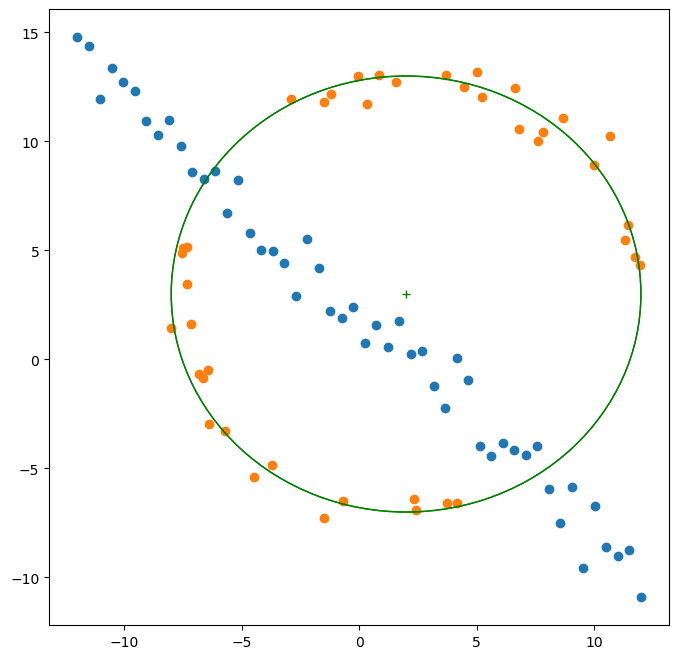

In [66]:
#draw fmodel result
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(circle_points[:, 0], circle_points[:, 1], label='Circle Points')
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground Truth Circle')
ax.add_artist(circle_gt)
ax.add_artist(circle_gt)
ax.plot((x0_gt), (y0_gt), '+', color='g')


